# Respiratory Sinus Arrhythmia (RSA)

* Install the App `phyphox` on your phone.  https://phyphox.org/download/

* Lie in bed and put your phone on your chest

* Open the app `phyphox`, choose `Acceleration with g` and start recording.

* Record for 5 mins, then stop it and Export Data as `CSV (Comma, decimal point)`

* Upload the zip to Colab and do analysis.

#for full presentation on RSA click link-

https://www.canva.com/design/DAGqctO5jlY/01Vovp3n2h-Z8m9bfwH5Bg/edit?utm_content=DAGqctO5jlY&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

full credit -Lior shonak , Ronny P Bartsch

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving idan_RSA.zip to idan_RSA.zip


In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3


In [ ]:
# You will get a zip file from phyphox
# upload the zip file to colab
!unzip idan_RSA.zip # Unzip the zip file.
# Remember to change to your own file's name
# The data is saved in Raw Data.csv

Archive:  idan_RSA.zip
  inflating: Raw Data.csv            
  inflating: meta/device.csv         
  inflating: meta/time.csv           


In [ ]:
import pandas as pd
import numpy as np

# read csv
df = pd.read_csv("Raw Data.csv")
df

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000015,0.506696,-1.947001,9.614507,9.822744
1,0.010081,0.492925,-1.954635,9.625134,9.833961
2,0.020148,0.497865,-1.954785,9.610016,9.819443
3,0.030215,0.495170,-1.946253,9.578581,9.786844
4,0.040282,0.501008,-1.944606,9.581725,9.789890
...,...,...,...,...,...
39754,400.212565,0.390688,-1.922452,9.651180,9.848540
39755,400.222633,0.401615,-1.917812,9.651779,9.848662
39756,400.232701,0.399070,-1.911375,9.653276,9.848774
39757,400.242769,0.395777,-1.905238,9.662257,9.856256


In [ ]:
# convert pandas series to numpy array
t = df.iloc[:, 0].values
acc_x = df.iloc[:, 1].values
acc_y = df.iloc[:, 2].values
acc_z = df.iloc[:, 3].values
abs_acc = df.iloc[:, 4].values

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt, hilbert
from scipy.interpolate import interp1d

## Visualizing Acceleration Signals Over Time

To understand the raw data, we first plot each acceleration channel (x, y, z, and absolute acceleration) versus time.  
This helps identify noise, drift, and the underlying periodic patterns due to breathing and heartbeats.

Each subplot below shows one axis. The absolute acceleration combines all three axes and can sometimes reveal motion artifacts or overall movement.


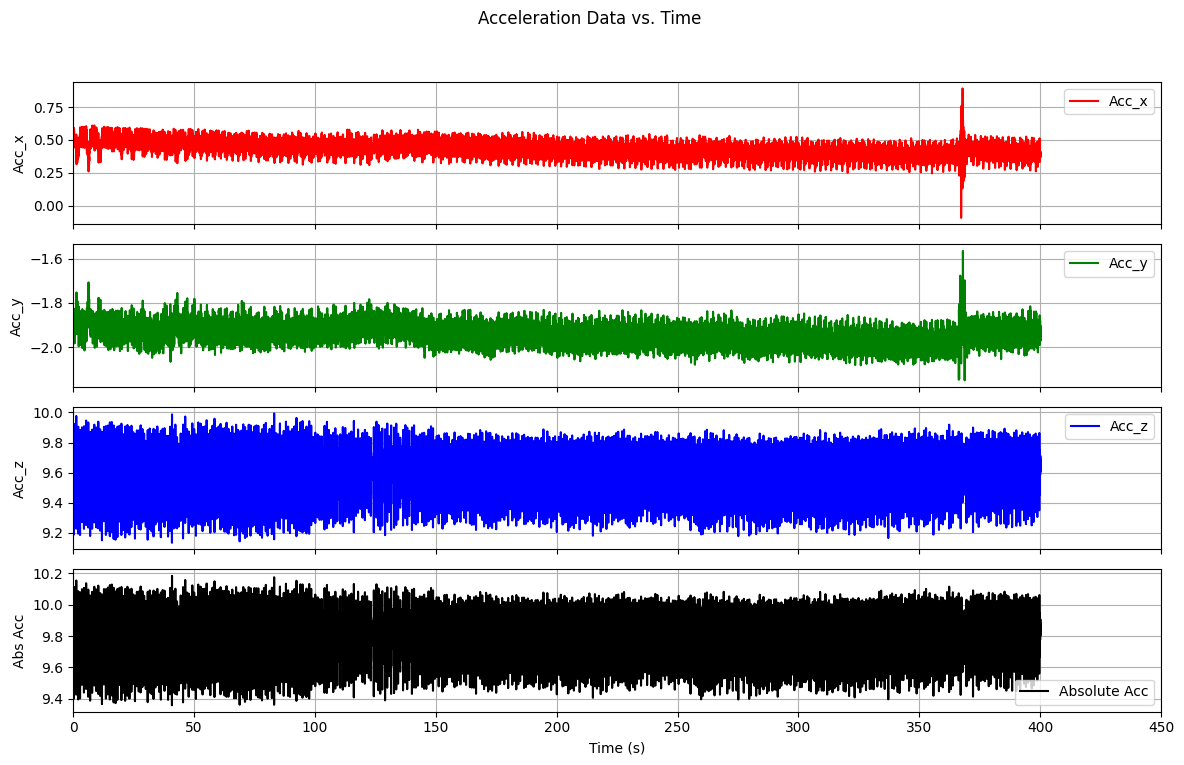

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 8))

axes[0].plot(t, acc_x, label='Acc_x', color='red')
axes[0].set_ylabel('Acc_x')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(t, acc_y, label='Acc_y', color='green')
axes[1].set_ylabel('Acc_y')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(t, acc_z, label='Acc_z', color='blue')
axes[2].set_ylabel('Acc_z')
axes[2].legend()
axes[2].grid(True)

axes[3].plot(t, abs_acc, label='Absolute Acc', color='black')
axes[3].set_ylabel('Abs Acc')
axes[3].set_xlabel('Time (s)')
axes[3].legend()
axes[3].grid(True)

fig.suptitle('Acceleration Data vs. Time')
plt.xlim([0, 450])  # Focus on the first 2 minutes for clarity
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


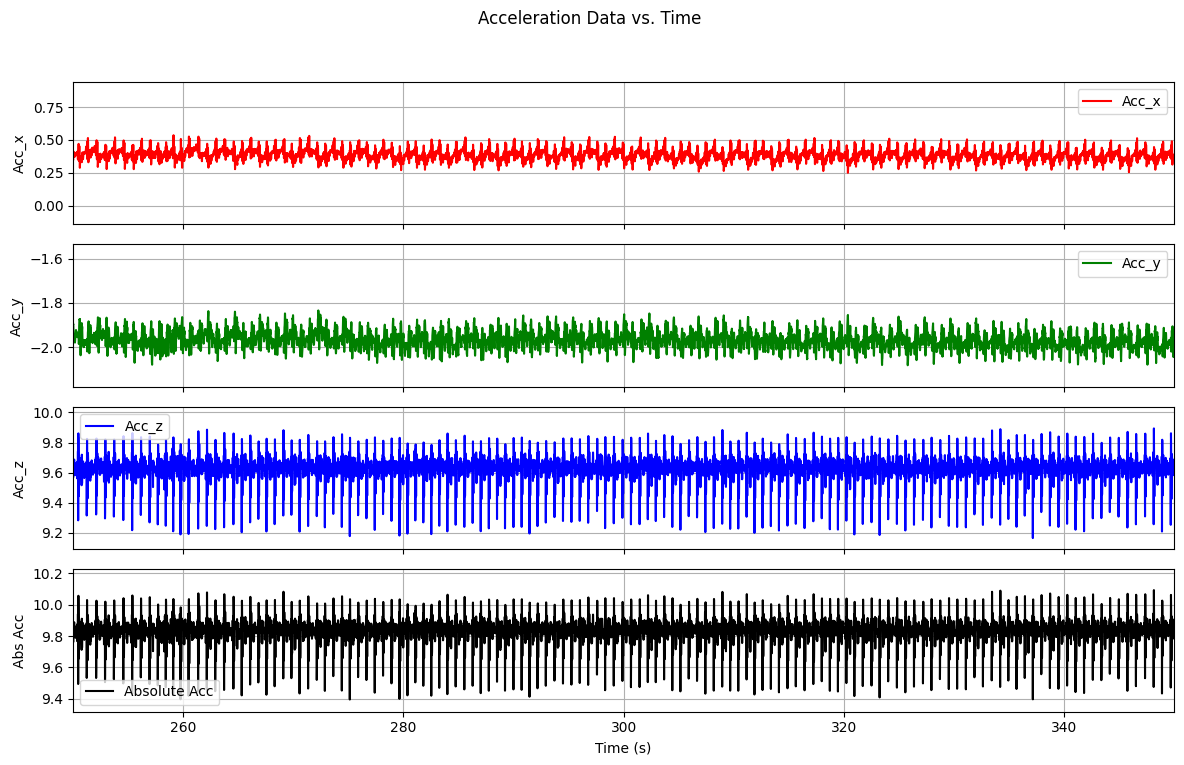

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 8))

axes[0].plot(t, acc_x, label='Acc_x', color='red')
axes[0].set_ylabel('Acc_x')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(t, acc_y, label='Acc_y', color='green')
axes[1].set_ylabel('Acc_y')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(t, acc_z, label='Acc_z', color='blue')
axes[2].set_ylabel('Acc_z')
axes[2].legend()
axes[2].grid(True)

axes[3].plot(t, abs_acc, label='Absolute Acc', color='black')
axes[3].set_ylabel('Abs Acc')
axes[3].set_xlabel('Time (s)')
axes[3].legend()
axes[3].grid(True)

fig.suptitle('Acceleration Data vs. Time')
plt.xlim([250, 350])  # Focus on the first 2 minutes for clarity
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


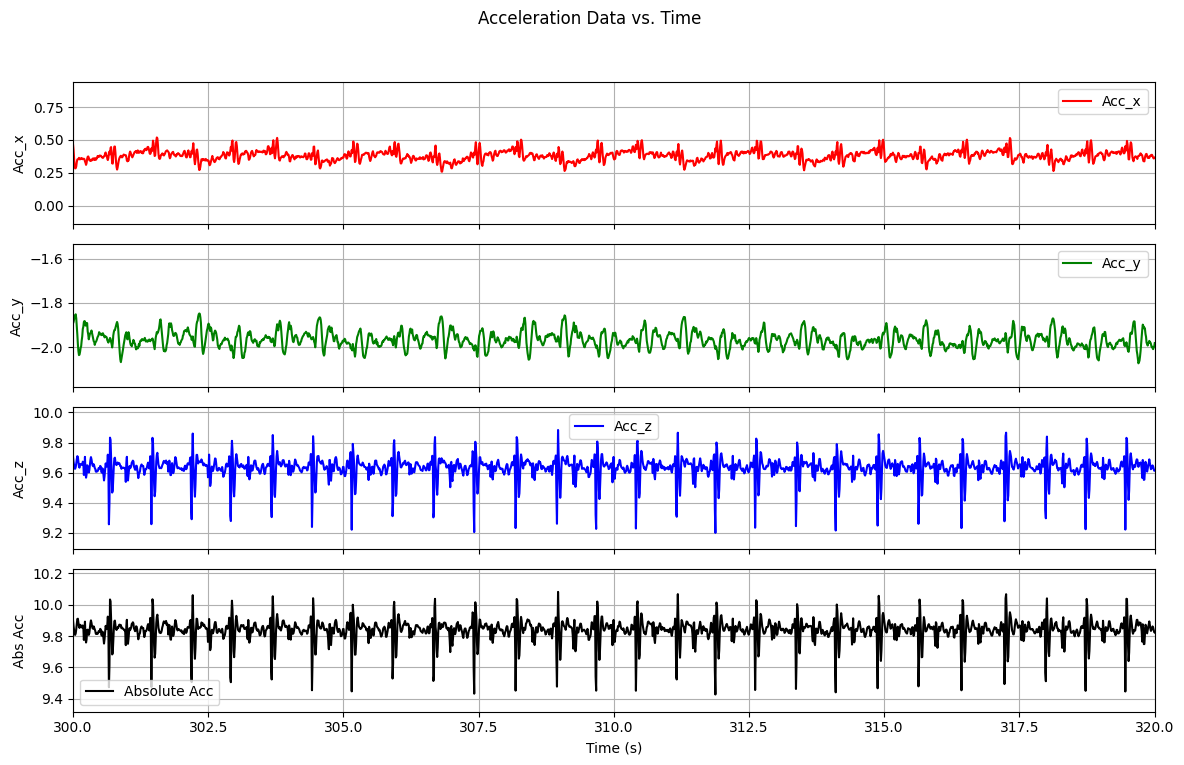

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 8))

axes[0].plot(t, acc_x, label='Acc_x', color='red')
axes[0].set_ylabel('Acc_x')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(t, acc_y, label='Acc_y', color='green')
axes[1].set_ylabel('Acc_y')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(t, acc_z, label='Acc_z', color='blue')
axes[2].set_ylabel('Acc_z')
axes[2].legend()
axes[2].grid(True)

axes[3].plot(t, abs_acc, label='Absolute Acc', color='black')
axes[3].set_ylabel('Abs Acc')
axes[3].set_xlabel('Time (s)')
axes[3].legend()
axes[3].grid(True)

fig.suptitle('Acceleration Data vs. Time')
plt.xlim([300, 320])  # Focus on the first 2 minutes for clarity
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

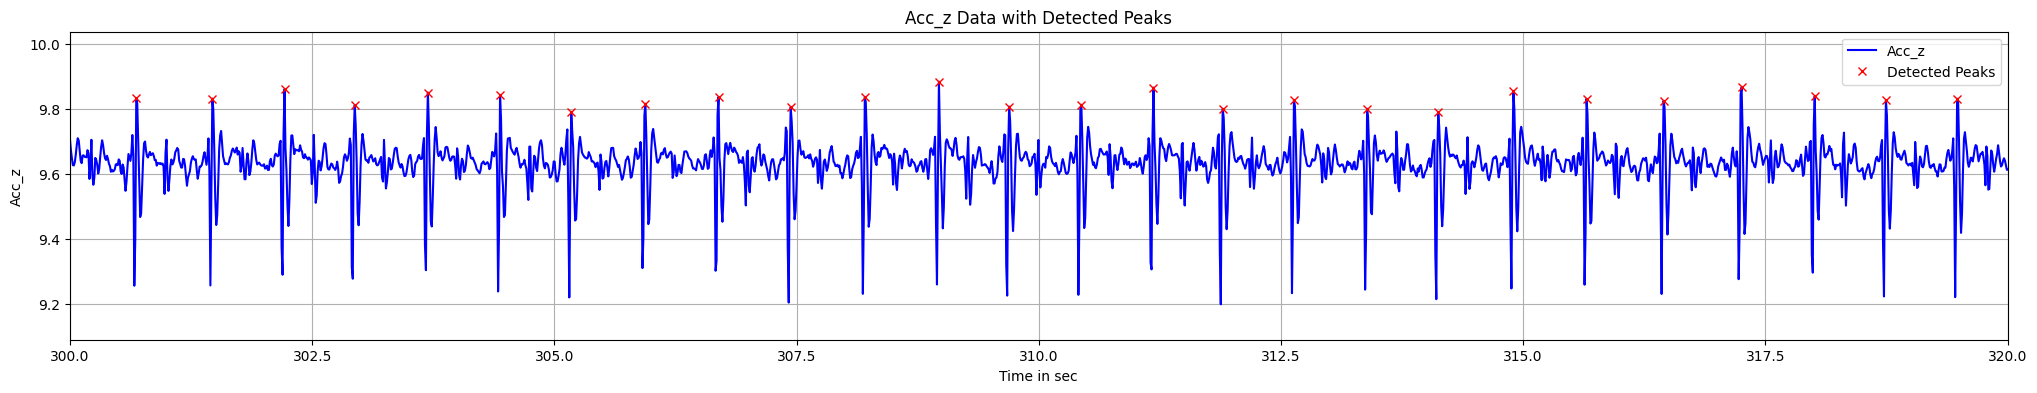

In [ ]:
# detect peaks in acc z
from scipy.signal import find_peaks

# Find peaks in acc_z
peaks, _ = find_peaks(acc_z, height=9.78, distance=50) # You might need to adjust the `height` parameter based on your data

# Plot the acc_z data and highlight the detected peaks
plt.figure(figsize=(25, 4))
plt.plot(t, acc_z, label='Acc_z', color='b')
plt.plot(t[peaks], acc_z[peaks], "x", label='Detected Peaks', color='r') # Mark peaks with 'x'
plt.xlim([300,320])
plt.ylabel('Acc_z')
plt.xlabel('Time in sec')
plt.grid(True)
plt.legend()
plt.title('Acc_z Data with Detected Peaks')
plt.show()

#print(f"Detected {len(peaks)} peaks in acc_z.")
#print(f"Indices of peaks: {peaks}")
#print(f"Time values of peaks: {t[peaks]}")
#print(f"Acc_z values at peaks: {acc_z[peaks]}")

## Extract and Visualize Peak Heights

After detecting peaks in the z-axis acceleration, we extract the **time** and **height** (amplitude) of each peak.  
This step provides a new time series that often corresponds to heartbeat-related events, and is used for further analysis, such as RR interval calculation.

Below, we create a DataFrame containing the time and height of each detected peak, display its first rows, and plot the peak heights over time.


First five detected peaks:
    Time (s)  Peak Height (Acc_z)
0  0.362417             9.924512
1  1.338889             9.976903
2  2.144225             9.905801
3  2.919363             9.883946
4  3.714637             9.901460


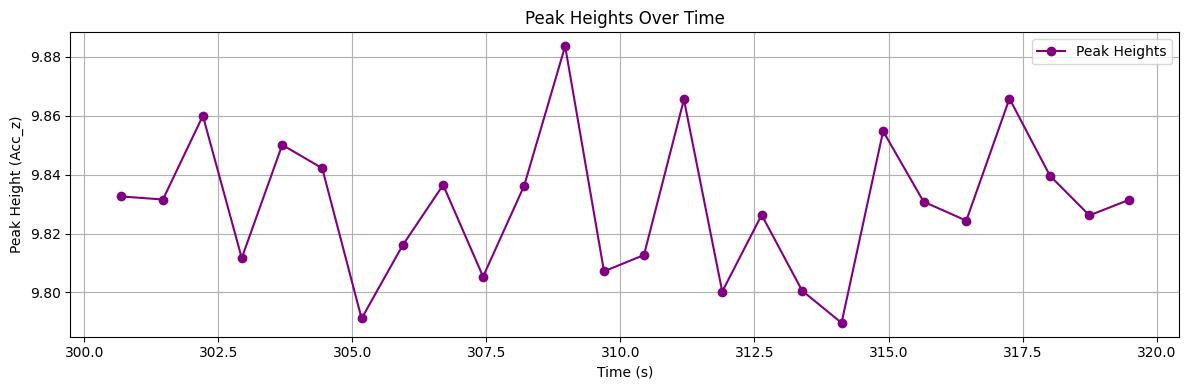

In [ ]:
# Extract time and height for each detected peak
peak_times = t[peaks]
peak_heights = acc_z[peaks]

# Combine into a DataFrame for easy handling and preview
peak_data = pd.DataFrame({'Time (s)': peak_times, 'Peak Height (Acc_z)': peak_heights})
print("First five detected peaks:\n", peak_data.head())

# Plot peak heights vs. time for the first 2 minutes (adjust if needed)
plt.figure(figsize=(12, 4))
interval = (300, 320)  # seconds
mask = (peak_times >= interval[0]) & (peak_times <= interval[1])
plt.plot(peak_times[mask], peak_heights[mask], '-o', label='Peak Heights', color='purple')
plt.xlabel('Time (s)')
plt.ylabel('Peak Height (Acc_z)')
plt.title('Peak Heights Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## Calculate and Visualize RR-Intervals

To analyze heart rate variability, we calculate the time intervals between consecutive detected peaks—known as **RR-intervals**.  
Each RR-interval reflects the time between two successive heartbeats, and the sequence of these intervals is a key feature in RSA analysis.

Below, we compute RR-intervals, store them as a time series, display the first few values, and plot them over time.


First five RR-intervals:
1.338889    0.976472
2.144225    0.805337
2.919363    0.775138
3.714637    0.795274
4.550171    0.835535
Name: RR-Interval (s), dtype: float64


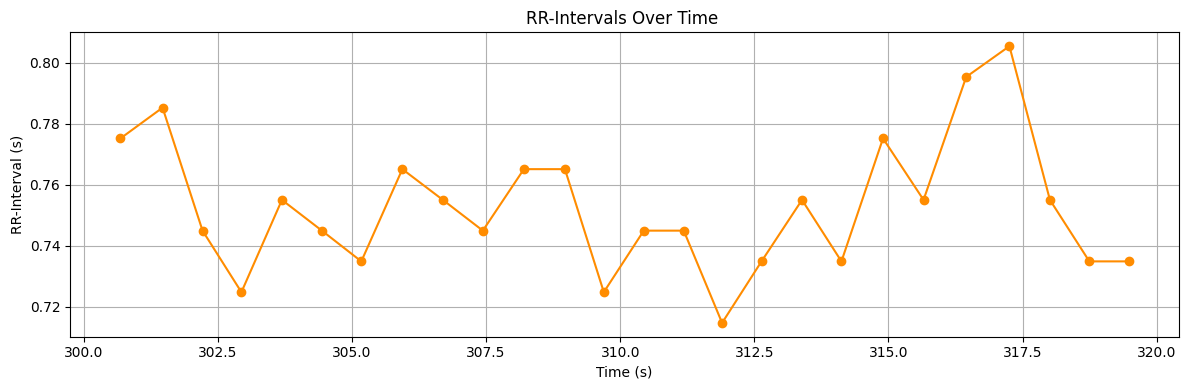

In [ ]:
# Calculate RR-intervals (time between consecutive peaks)
rr_intervals = np.diff(peak_times)  # in seconds
rr_times = peak_times[1:]  # time assigned to the second peak in each pair

# Create a pandas Series for easier analysis and plotting
rr_series = pd.Series(rr_intervals, index=rr_times, name='RR-Interval (s)')

print("First five RR-intervals:")
print(rr_series.head())

# Plot RR-intervals over the first 2 minutes (adjust if needed)
plt.figure(figsize=(12, 4))
interval = (300, 320)
mask = (rr_series.index >= interval[0]) & (rr_series.index <= interval[1])
plt.plot(rr_series.index[mask], rr_series.values[mask], '-o', color='darkorange')
plt.ylabel('RR-Interval (s)')
plt.xlabel('Time (s)')
plt.title('RR-Intervals Over Time ')
plt.grid(True)
plt.tight_layout()
plt.show()


## Resample Peak Heights onto an Equidistant Time Grid

Many signal processing techniques (like FFT or filtering) require signals sampled at **regular time intervals**.  
Since heartbeats (and therefore peaks) are irregularly spaced in time, we interpolate the peak heights onto a **uniform, equidistant time grid**.

Below, we:
- Define an equidistant time grid,
- Interpolate peak heights onto this grid,
- Print the first values,
- Visualize both the original and interpolated (equidistant) series.


Sampling frequency for resampled series: 4.00 Hz
First five rows of the interpolated series:
   Time (s)  Peak Height (Acc_z)
0  0.362417             9.924512
1  0.612121             9.937909
2  0.861825             9.951307
3  1.111528             9.964704
4  1.361232             9.974930


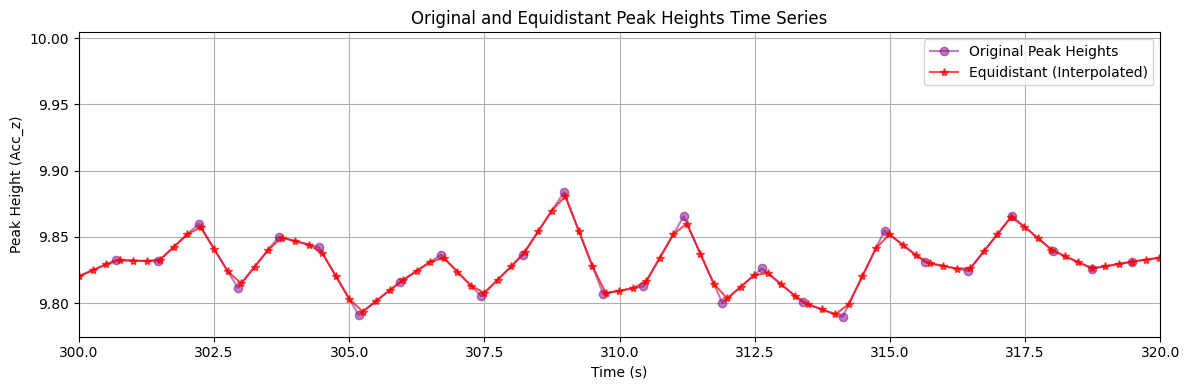

In [ ]:
#Create a new, equidistant time index for the peak times
# Determine the start and end time from your peak_times
start_time = peak_times.min()
end_time = peak_times.max()

# Determine start and end times from peak_times
start_time = peak_times.min()
end_time = peak_times.max()

# Set the number of resampled points (affects the time resolution)
num_points = 1600  # Can adjust for finer/coarser resolution
total_duration = end_time - start_time
sampling_frequency = (num_points - 1) / total_duration
print(f"Sampling frequency for resampled series: {sampling_frequency:.2f} Hz")

# Create the equidistant time vector
equidistant_times = np.linspace(start_time, end_time, num_points)

# Linear interpolation of peak heights onto this grid
interpolation_function = interp1d(peak_times, peak_heights, kind='linear', bounds_error=False, fill_value="extrapolate")
equidistant_peak_heights = interpolation_function(equidistant_times)

# Preview as DataFrame
equidistant_peak_data = pd.DataFrame({'Time (s)': equidistant_times, 'Peak Height (Acc_z)': equidistant_peak_heights})
print("First five rows of the interpolated series:")
print(equidistant_peak_data.head())

# Plot both the original and interpolated series (first 2 minutes)
plt.figure(figsize=(12, 4))
interval = (300, 320)
plt.plot(peak_times, peak_heights, 'o-', label='Original Peak Heights', color='purple', alpha=0.5)
plt.plot(equidistant_times, equidistant_peak_heights, '*-', label='Equidistant (Interpolated)', color='red', alpha=0.7)
plt.xlim(interval)
plt.ylabel('Peak Height (Acc_z)')
plt.xlabel('Time (s)')
plt.title('Original and Equidistant Peak Heights Time Series')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Resample RR-Intervals onto an Equidistant Time Grid

To analyze RR-intervals using standard signal processing tools, we need them on a regular time grid.
Here, we use **cubic spline interpolation** to map the original (irregular) RR-interval series onto the equidistant time grid created earlier.

This allows us to compare the RR-interval signal directly with other uniformly sampled signals and prepare it for filtering or spectral analysis.


First five rows of the equidistant RR-interval series:
   Time (s)  RR-Interval (s)
0  1.361232         0.968889
1  1.610936         0.896369
2  1.860640         0.844102
3  2.110343         0.808958
4  2.360047         0.787805
Sampling frequency of resampled RR-Intervals: 4.00 Hz


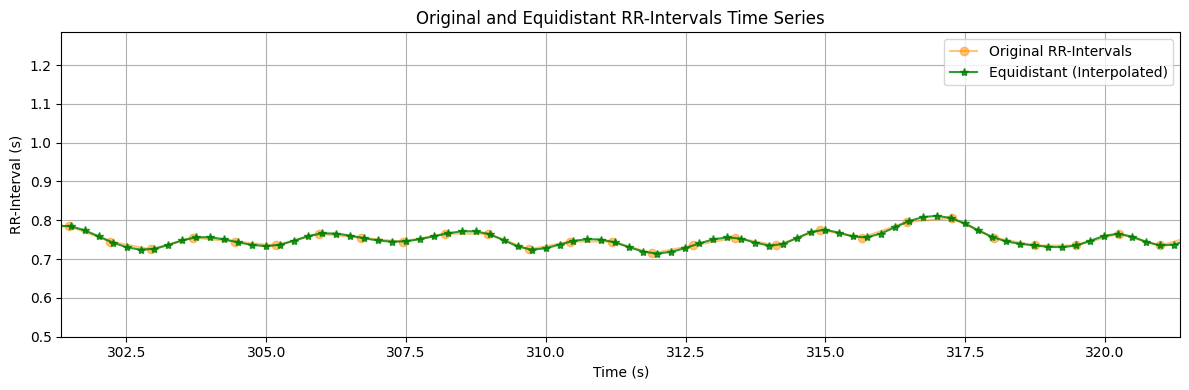

In [ ]:
# Cubic spline interpolation of RR-intervals
interpolation_function_rr = interp1d(rr_series.index, rr_series.values, kind='cubic', bounds_error=False, fill_value="extrapolate")

# Only interpolate at equidistant_times that fall within the range of the original RR-interval times
valid_mask = (equidistant_times >= rr_series.index.min()) & (equidistant_times <= rr_series.index.max())
equidistant_times_rr = equidistant_times[valid_mask]
equidistant_rr_intervals = interpolation_function_rr(equidistant_times_rr)

# Put results in a DataFrame for preview
equidistant_rr_data = pd.DataFrame({'Time (s)': equidistant_times_rr, 'RR-Interval (s)': equidistant_rr_intervals})
print("First five rows of the equidistant RR-interval series:")
print(equidistant_rr_data.head())

# Calculate sampling frequency for the resampled RR-intervals
time_diff_rr = np.diff(equidistant_times_rr)
sampling_frequency_rr = 1.0 / np.mean(time_diff_rr)
print(f"Sampling frequency of resampled RR-Intervals: {sampling_frequency_rr:.2f} Hz")

# Plot original and equidistant RR-intervals (first 2 minutes for clarity)
plt.figure(figsize=(12, 4))
plot_start = rr_series.index.min()
plt.plot(rr_series.index, rr_series.values, 'o-', label='Original RR-Intervals', color='darkorange', alpha=0.5)
plt.plot(equidistant_times_rr, equidistant_rr_intervals, '*-', label='Equidistant (Interpolated)', color='green', alpha=0.8)
plt.xlim([plot_start+300, plot_start + 320])  # show first 2 minutes
plt.ylabel('RR-Interval (s)')
plt.xlabel('Time (s)')
plt.title('Original and Equidistant RR-Intervals Time Series')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

def bandpass_filter(x, band, fs):
    """
    Bandpass filter using FFT.

    Parameters:
    x (numpy array): raw signal
    band (List): [low frequency band, high frequency band]
    fs (int): sampling frequency

    Returns:
    Filtered signal (numpy array)
    """
    from numpy.fft import rfft, irfft
    fft_result = rfft(x)
    delta_f = fs / x.size
    start_i = int(band[0] / delta_f)
    end_i = int(band[1] / delta_f)
    fft_result[:start_i] = 0
    fft_result[end_i:] = 0
    return irfft(fft_result, n=x.size)



## Bandpass Filtering of All Signals (0.15–0.4 Hz)

To isolate respiratory-related oscillations in our physiological signals, we apply the **bandpass filter** (0.15–0.4 Hz) to:

- All acceleration axes (x, y, z)
- The absolute acceleration
- Interpolated R-peak heights
- Interpolated RR-intervals

Filtering focuses our analysis on the frequency range where breathing typically modulates both motion and heart rhythm.  
The plots below compare each original signal with its filtered version, letting us visually confirm the effectiveness of the filter.


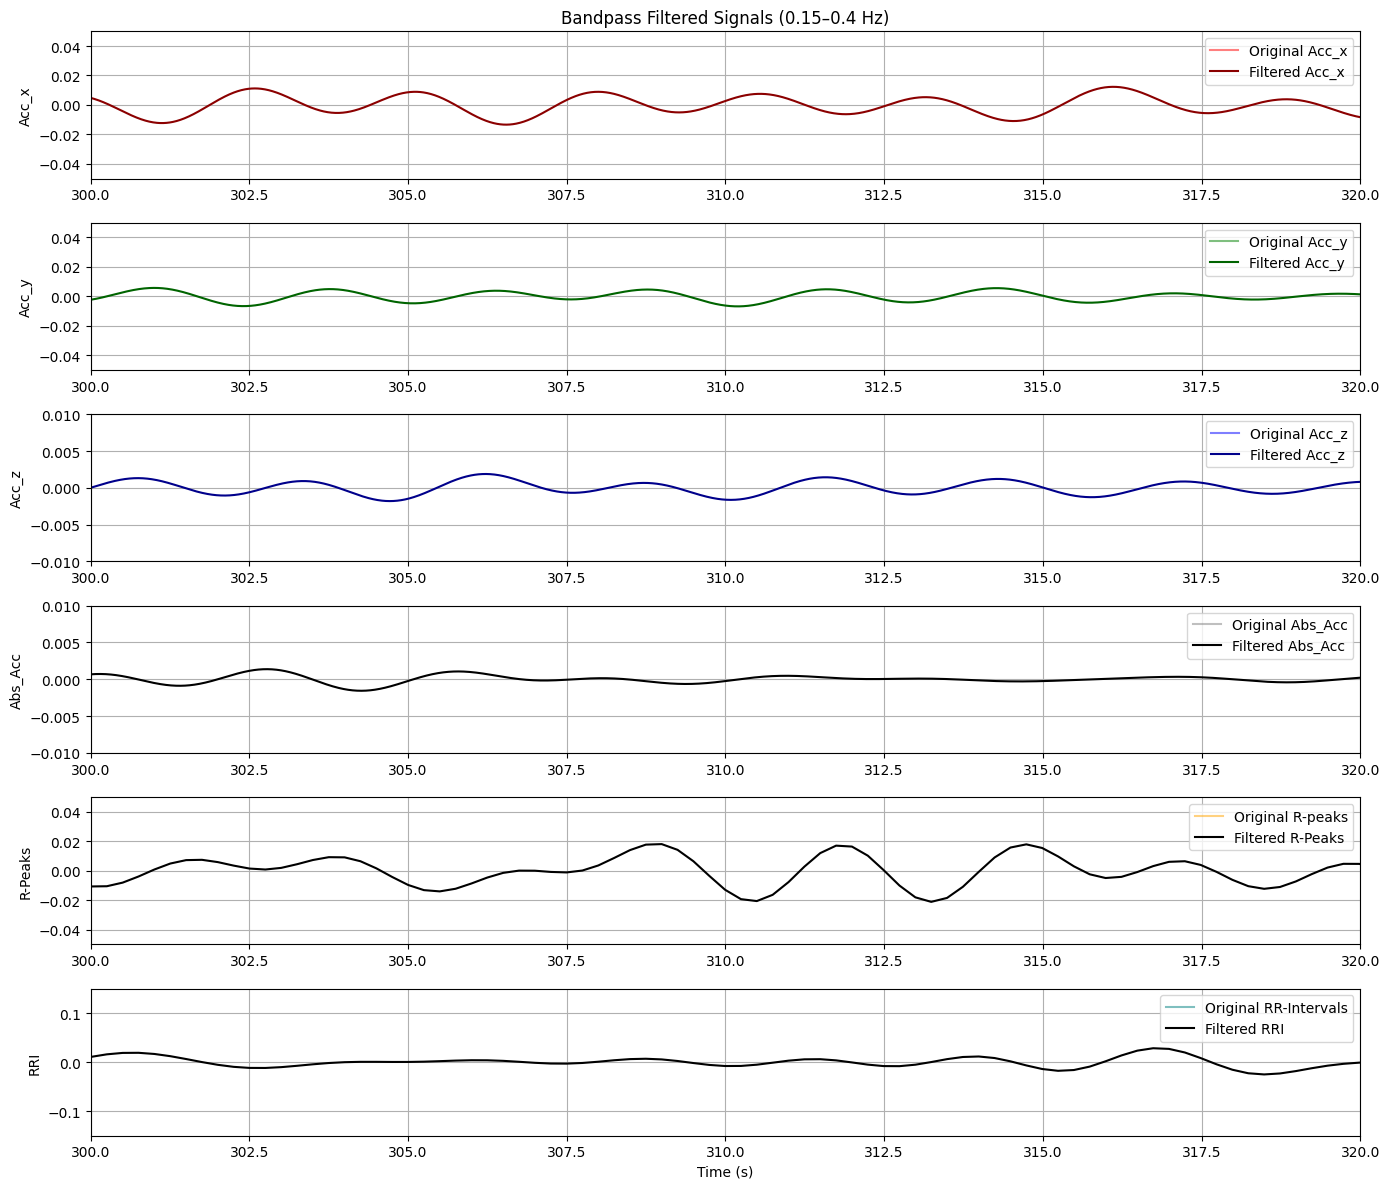

In [ ]:
## Bandpass filter all signals in the respiratory frequency band of 0.15-0.4 Hz

# Acceleration signals (sampled at 100 Hz)
Fil_acc_x = bandpass_filter(acc_x, [0.15, 0.4], fs=100)
Fil_acc_y = bandpass_filter(acc_y, [0.15, 0.4], fs=100)
Fil_acc_z = bandpass_filter(acc_z, [0.15, 0.4], fs=100)
Fil_abs_acc = bandpass_filter(abs_acc, [0.15, 0.4], fs=100)

# Interpolated signals (sampled at 4 Hz)
Fil_peaks = bandpass_filter(equidistant_peak_heights, [0.15, 0.4], fs=4)
Fil_RRI = bandpass_filter(equidistant_rr_intervals, [0.15, 0.4], fs=4)

# Plot comparison of original and filtered signals
plt.figure(figsize=(14, 12))

plt.subplot(6, 1, 1)
plt.plot(t, acc_x, label='Original Acc_x', color='red', alpha=0.5)
plt.plot(t, Fil_acc_x, label='Filtered Acc_x', color='darkred')
plt.xlim([300, 320])
plt.ylim([-0.05, 0.05])
plt.ylabel('Acc_x')
plt.grid(True)
plt.legend()
plt.title('Bandpass Filtered Signals (0.15–0.4 Hz)')

plt.subplot(6, 1, 2)
plt.plot(t, acc_y, label='Original Acc_y', color='green', alpha=0.5)
plt.plot(t, Fil_acc_y, label='Filtered Acc_y', color='darkgreen')
plt.xlim([300, 320])
plt.ylim([-0.05, 0.05])
plt.ylabel('Acc_y')
plt.grid(True)
plt.legend()

plt.subplot(6, 1, 3)
plt.plot(t, acc_z, label='Original Acc_z', color='blue', alpha=0.5)
plt.plot(t, Fil_acc_z, label='Filtered Acc_z', color='darkblue')
plt.xlim([300, 320])
plt.ylim([-0.01, 0.01])
plt.ylabel('Acc_z')
plt.grid(True)
plt.legend()

plt.subplot(6, 1, 4)
plt.plot(t, abs_acc, label='Original Abs_Acc', color='grey', alpha=0.5)
plt.plot(t, Fil_abs_acc, label='Filtered Abs_Acc', color='black')
plt.xlim([300, 320])
plt.ylim([-0.01, 0.01])
plt.ylabel('Abs_Acc')
plt.grid(True)
plt.legend()

plt.subplot(6, 1, 5)
plt.plot(equidistant_times, equidistant_peak_heights, label='Original R-peaks', color='orange', alpha=0.5)
plt.plot(equidistant_times, Fil_peaks, label='Filtered R-Peaks', color='black')
plt.xlim([300, 320])
plt.ylim([-0.05, 0.05])
plt.ylabel('R-Peaks')
plt.grid(True)
plt.legend()

plt.subplot(6, 1, 6)
plt.plot(equidistant_times_rr, equidistant_rr_intervals, label='Original RR-Intervals', color='teal', alpha=0.5)
plt.plot(equidistant_times_rr, Fil_RRI, label='Filtered RRI', color='black')
plt.xlim([300, 320])
plt.ylim([-0.15, 0.15])
plt.ylabel('RRI')
plt.xlabel('Time (s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



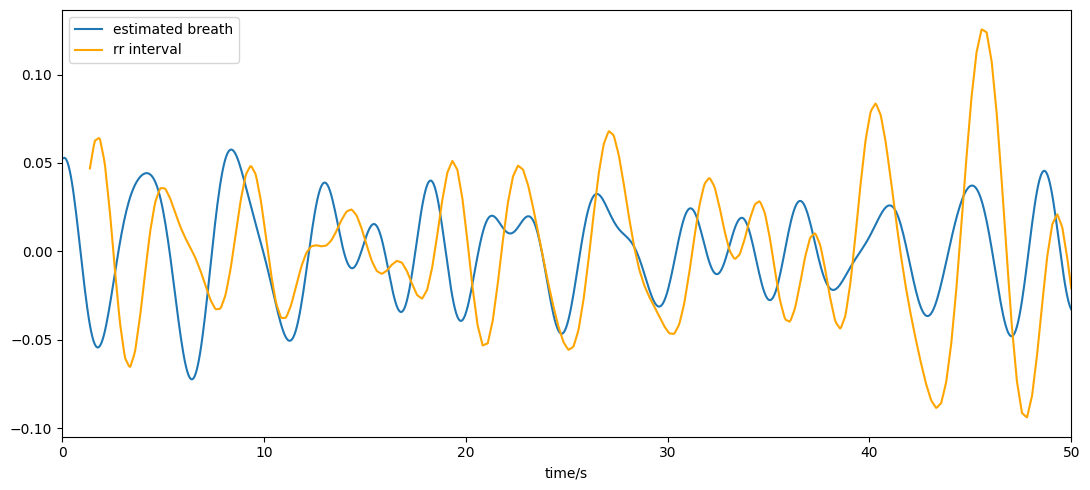

In [ ]:
# Choose the time window as in the plot: 50–250 seconds
plot_start, plot_end = 0, 50

# For signals at different sampling rates, interpolate both to a common time base for fair comparison
common_time = np.linspace(plot_start, plot_end, 800)  # 800 points for smooth plot

# Interpolate filtered acc_x (sampled at 100 Hz)
from scipy.interpolate import interp1d
interp_acc_x = interp1d(t, Fil_acc_x, kind='linear', bounds_error=False, fill_value=np.nan)
breath_estimated = interp_acc_x(common_time)

# Interpolate filtered RR intervals (sampled at 4 Hz)
interp_rr = interp1d(equidistant_times_rr, Fil_RRI, kind='linear', bounds_error=False, fill_value=np.nan)
rr_interval = interp_rr(common_time)

plt.figure(figsize=(11, 5))
plt.plot(common_time, breath_estimated, label='estimated breath')
plt.plot(common_time, rr_interval, label='rr interval', color='orange')
plt.xlabel('time/s')
plt.ylabel('')
plt.xlim(plot_start, plot_end)
plt.legend()
plt.tight_layout()
plt.show()


## Instantaneous Phase and Phase Difference Analysis (Hilbert Transform)

To study the synchrony between heartbeats and respiration, we use the **Hilbert transform** to compute the *instantaneous phase* of each bandpass-filtered signal.  
The phase difference between signals (e.g., acceleration axes, R-peaks, RR-intervals) reveals how closely their cycles are locked—a hallmark of RSA.

In this section:
- We compute unwrapped phase for each signal.
- We align signals sampled on different time bases using interpolation.
- We plot the cumulative phase difference between various signal pairs to visualize synchrony and potential phase drift.


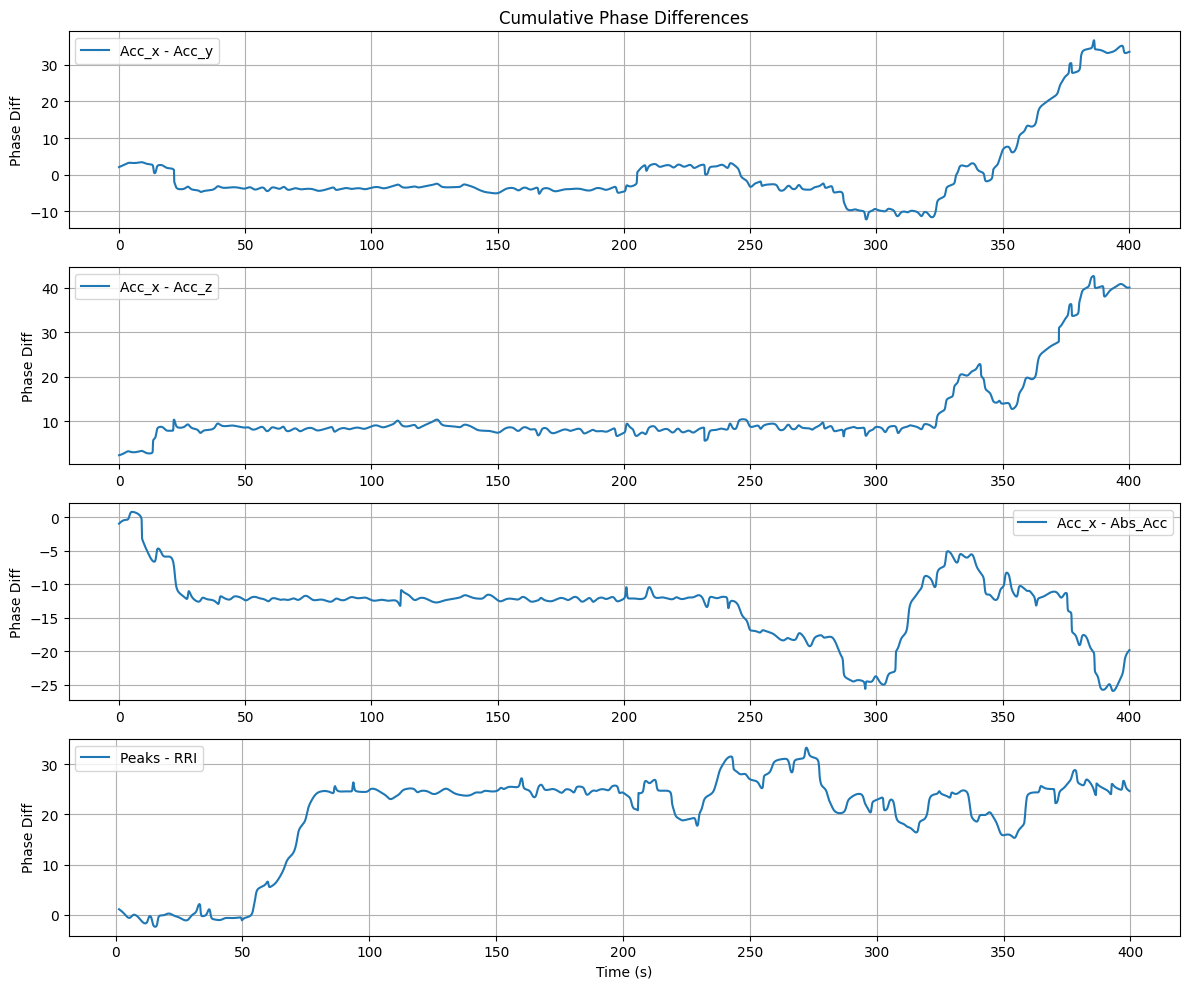


Calculated cumulative phase differences for pairs of filtered signals:
Phase Difference (Acc_x - Acc_y): [2.09102159 2.0939758  2.09692955 2.09988277 2.10283542 2.10578744
 2.10873877 2.11168937 2.11463919 2.11758817] ...
Phase Difference (Acc_x - Acc_z): [2.38567386 2.38691527 2.38817088 2.38944054 2.3907241  2.39202143
 2.39333237 2.39465678 2.39599452 2.39734546] ...
Phase Difference (Acc_x - Abs_Acc): [-0.98986679 -0.98572964 -0.98160832 -0.97750281 -0.97341306 -0.96933903
 -0.96528068 -0.96123797 -0.95721086 -0.95319933] ...
Phase Difference (Peaks - RRI) (aligned time): [1.08986817 0.99791861 0.90435557 0.80701267 0.70403089 0.5938471
 0.47532643 0.34804211 0.21267528 0.071424  ] ...


In [ ]:
from scipy.signal import hilbert
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

# Function to compute unwrapped instantaneous phase using Hilbert transform
def get_instantaneous_phase(signal):
    analytic_signal = hilbert(signal)
    return np.unwrap(np.angle(analytic_signal))

# Calculate instantaneous phase for each filtered signal
phase_acc_x    = get_instantaneous_phase(Fil_acc_x)
phase_acc_y    = get_instantaneous_phase(Fil_acc_y)
phase_acc_z    = get_instantaneous_phase(Fil_acc_z)
phase_abs_acc  = get_instantaneous_phase(Fil_abs_acc)
phase_peaks    = get_instantaneous_phase(Fil_peaks)
phase_RRI      = get_instantaneous_phase(Fil_RRI)

# Phase differences for signals on the same time base (t)
phase_diff_acc_x_acc_y   = phase_acc_x - phase_acc_y
phase_diff_acc_x_acc_z   = phase_acc_x - phase_acc_z
phase_diff_acc_x_abs_acc = phase_acc_x - phase_abs_acc

# Align phase_peaks to the time base of RR intervals (equidistant_times_rr) for comparison
interp_phase_peaks = interp1d(equidistant_times, phase_peaks, kind='linear', bounds_error=False, fill_value=np.nan)
aligned_phase_peaks = interp_phase_peaks(equidistant_times_rr)

# Phase difference between aligned peak phase and RRI phase (only where not NaN)
valid_indices = ~np.isnan(aligned_phase_peaks)
phase_diff_peaks_RRI = aligned_phase_peaks[valid_indices] - phase_RRI[valid_indices]
aligned_times_peaks_RRI = equidistant_times_rr[valid_indices]

# Plot phase differences
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, phase_diff_acc_x_acc_y, label='Acc_x - Acc_y')
plt.ylabel('Phase Diff')
plt.title('Cumulative Phase Differences')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, phase_diff_acc_x_acc_z, label='Acc_x - Acc_z')
plt.ylabel('Phase Diff')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t, phase_diff_acc_x_abs_acc, label='Acc_x - Abs_Acc')
plt.ylabel('Phase Diff')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(aligned_times_peaks_RRI, phase_diff_peaks_RRI, label='Peaks - RRI')
plt.ylabel('Phase Diff')
plt.xlabel('Time (s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Preview the first 10 values for documentation/debugging
print("\nCalculated cumulative phase differences for pairs of filtered signals:")
print("Phase Difference (Acc_x - Acc_y):", phase_diff_acc_x_acc_y[:10], "...")
print("Phase Difference (Acc_x - Acc_z):", phase_diff_acc_x_acc_z[:10], "...")
print("Phase Difference (Acc_x - Abs_Acc):", phase_diff_acc_x_abs_acc[:10], "...")
print("Phase Difference (Peaks - RRI) (aligned time):", phase_diff_peaks_RRI[:10], "...")


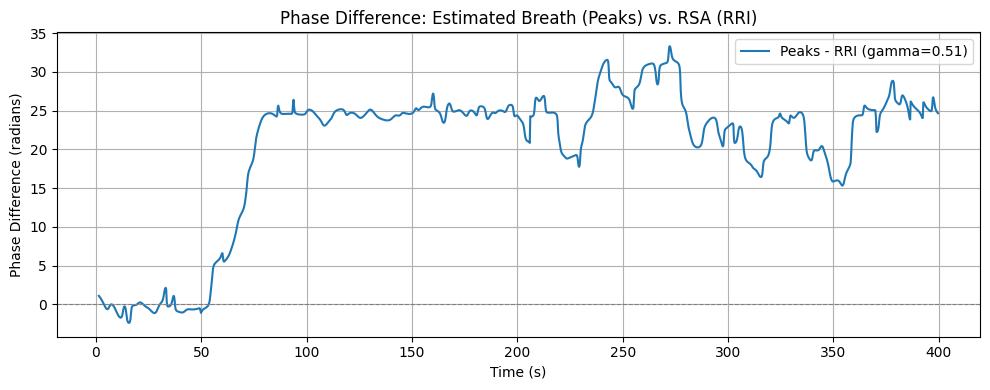

In [ ]:
gamma_peaks_rri = np.abs(np.mean(np.exp(1j * phase_diff_peaks_RRI)))
plt.figure(figsize=(10, 4))
plt.plot(aligned_times_peaks_RRI, phase_diff_peaks_RRI, label=f'Peaks - RRI (gamma={gamma_peaks_rri:.2f})')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.ylabel('Phase Difference (radians)')
plt.xlabel('Time (s)')
plt.title('Phase Difference: Estimated Breath (Peaks) vs. RSA (RRI)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Phase Synchronization Analysis: Histograms & Indices

To quantify how "locked" the phases are between different signals (e.g., heart vs. breathing), we:

- Compute phase differences for **all pairs** of signals (acceleration axes, absolute acceleration, R-peaks, RR-intervals).
- Align signals to a common time base if needed (via interpolation).
- Wrap phase differences into \([-π, π]\) for circular statistics.
- Compute two synchronization indices for each pair:
    - **Gamma**: Mean resultant vector length (ranges 0–1, higher = stronger phase locking).
    - **Rho**: Shannon-entropy-based index (1 = strong locking, 0 = uniform/random phase difference).
- Plot histograms of phase differences for all 15 signal pairs, with Gamma and Rho values in each subplot legend.

This comprehensive view reveals which physiological signals are most phase-locked—and at what phase offset.


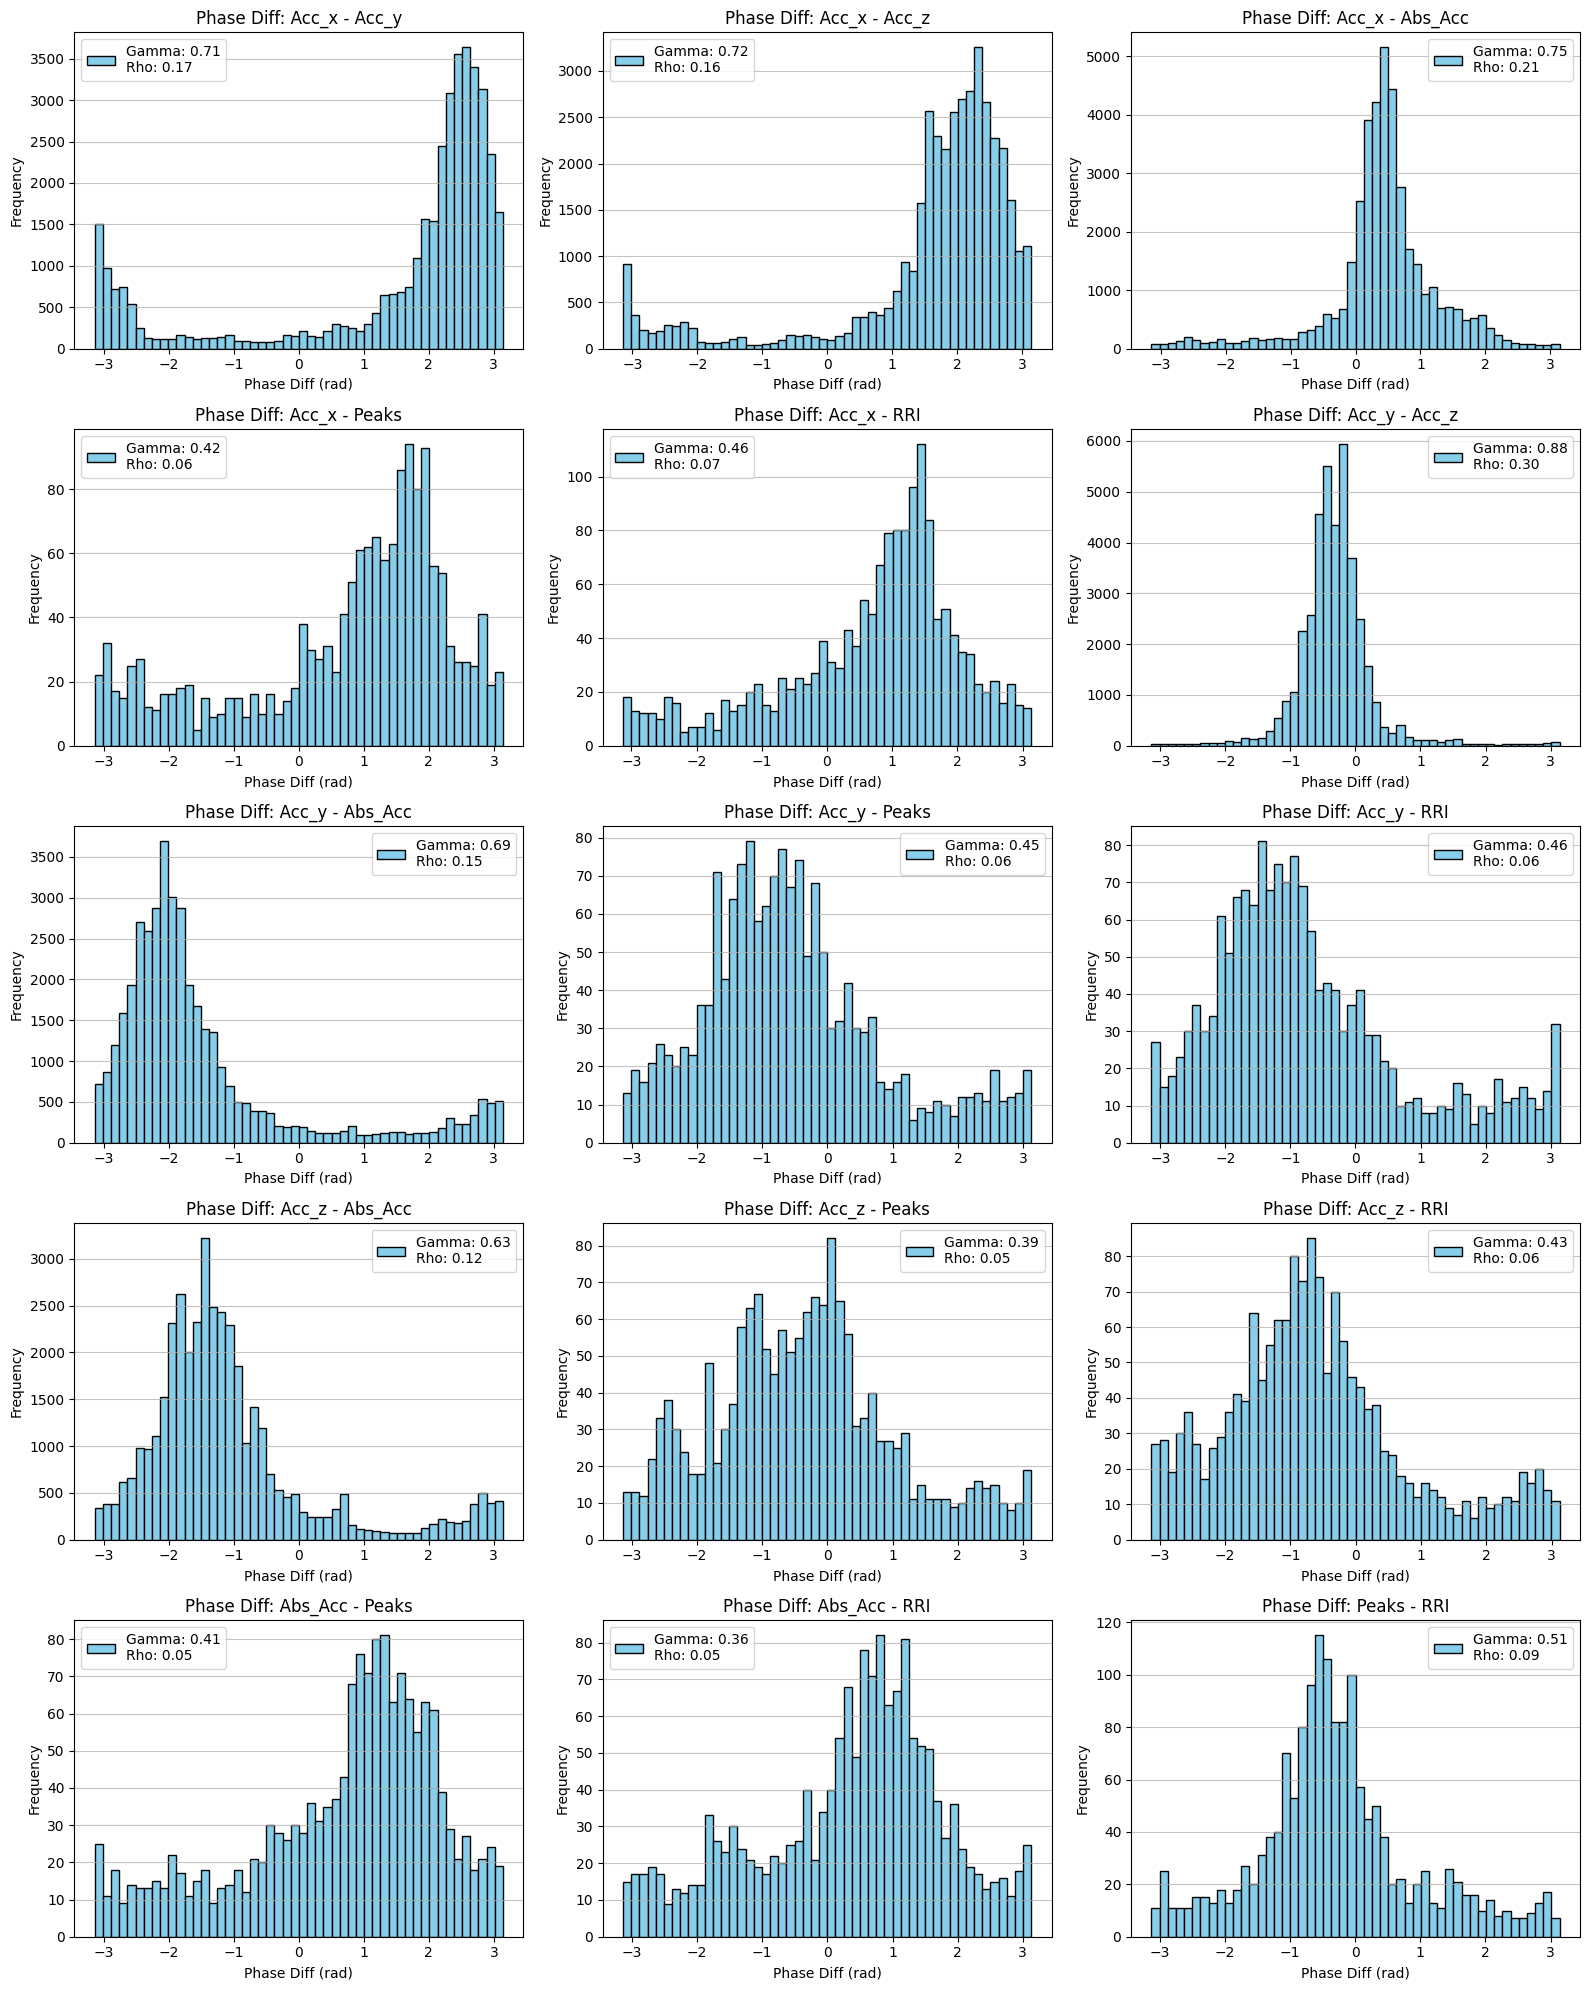

In [ ]:
from scipy.interpolate import interp1d
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt

# List of signals to analyze
signals = {
    'Acc_x': phase_acc_x,
    'Acc_y': phase_acc_y,
    'Acc_z': phase_acc_z,
    'Abs_Acc': phase_abs_acc,
    'Peaks': aligned_phase_peaks,
    'RRI': phase_RRI,
}
time_bases = {
    'Acc_x': t,
    'Acc_y': t,
    'Acc_z': t,
    'Abs_Acc': t,
    'Peaks': equidistant_times_rr[valid_indices],
    'RRI': equidistant_times_rr[valid_indices],
}

# All unique pairs
signal_names = list(signals.keys())
pairs = [(signal_names[i], signal_names[j]) for i in range(len(signal_names)) for j in range(i + 1, len(signal_names))]

phase_differences = {}

for s1_name, s2_name in pairs:
    phase1, phase2 = signals[s1_name], signals[s2_name]
    time1, time2 = time_bases[s1_name], time_bases[s2_name]

    # Align to common time base if needed
    if not np.array_equal(time1, time2):
        common_time = equidistant_times_rr[valid_indices]
        interp_phase1 = interp1d(time1, phase1, kind='linear', bounds_error=False, fill_value=np.nan)
        interp_phase2 = interp1d(time2, phase2, kind='linear', bounds_error=False, fill_value=np.nan)
        aligned_phase1 = interp_phase1(common_time)
        aligned_phase2 = interp_phase2(common_time)
        valid = ~np.isnan(aligned_phase1) & ~np.isnan(aligned_phase2)
        aligned_phase1 = aligned_phase1[valid]
        aligned_phase2 = aligned_phase2[valid]
    else:
        aligned_phase1 = phase1
        aligned_phase2 = phase2

    # Wrap to [-pi, pi]
    diff = aligned_phase1 - aligned_phase2
    wrapped_diff = (diff + np.pi) % (2 * np.pi) - np.pi

    phase_differences[f'{s1_name} - {s2_name}'] = wrapped_diff

# Compute gamma and rho indices
synchronization_indices = {}
rho_indices = {}

for pair_name, phase_diff_data in phase_differences.items():
    # Gamma (vector strength)
    gamma = np.abs(np.mean(np.exp(1j * phase_diff_data)))
    synchronization_indices[pair_name] = gamma

    # Rho (entropy-based)
    hist, _ = np.histogram(phase_diff_data, bins=50, density=True)
    shannon_entropy = entropy(hist, base=2)
    max_entropy = np.log2(len(hist))
    rho = (max_entropy - shannon_entropy) / max_entropy if max_entropy > 0 else 0
    rho_indices[pair_name] = rho

# Plot histograms
num_pairs = len(pairs)
ncols = 3
nrows = (num_pairs + ncols - 1) // ncols

plt.figure(figsize=(16, nrows * 4))
for i, (pair_name, phase_diff_data) in enumerate(phase_differences.items()):
    plt.subplot(nrows, ncols, i + 1)
    plt.hist(phase_diff_data, bins=50, color='skyblue', edgecolor='black',
             label=f'Gamma: {synchronization_indices[pair_name]:.2f}\nRho: {rho_indices[pair_name]:.2f}')
    plt.title(f'Phase Diff: {pair_name}')
    plt.xlabel('Phase Diff (rad)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.legend()

plt.tight_layout()
plt.show()

# (Optional) Print the synchronization indices:
#print("Gamma indices:", synchronization_indices)
#print("Rho indices:", rho_indices)


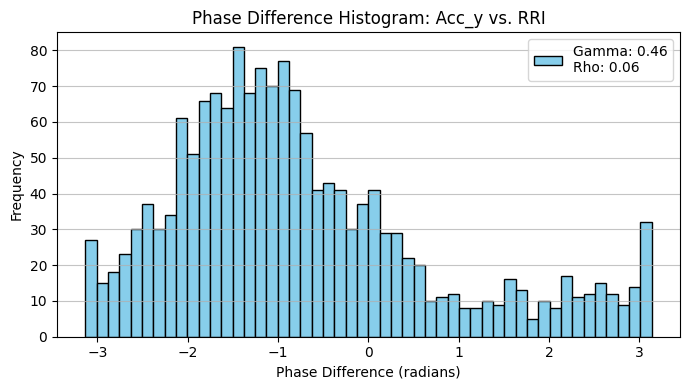

In [ ]:
# Choose the most important pair
key = 'Acc_y - RRI'
data = phase_differences[key]
gamma = synchronization_indices[key]
rho = rho_indices[key]

plt.figure(figsize=(7, 4))
plt.hist(data, bins=50, color='skyblue', edgecolor='black',
         label=f'Gamma: {gamma:.2f}\nRho: {rho:.2f}')
plt.title('Phase Difference Histogram: Acc_y vs. RRI')
plt.xlabel('Phase Difference (radians)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.tight_layout()
plt.show()


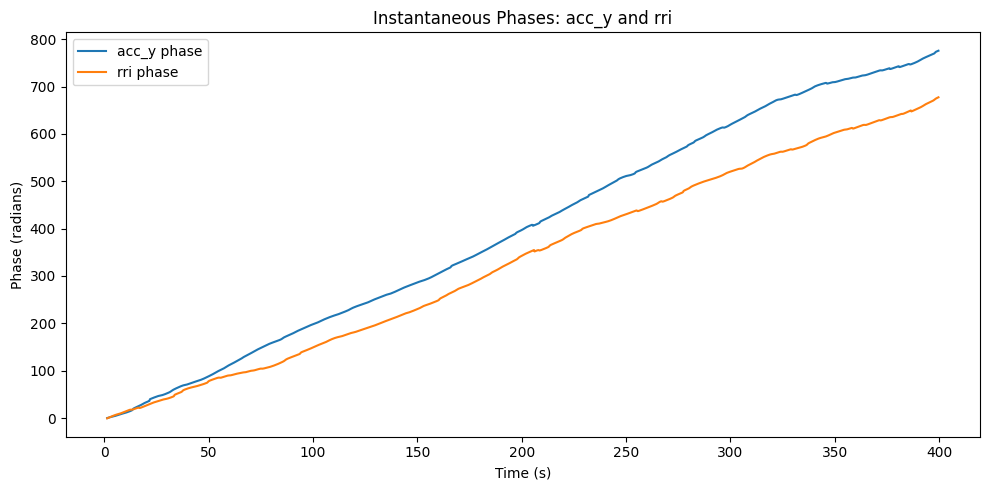

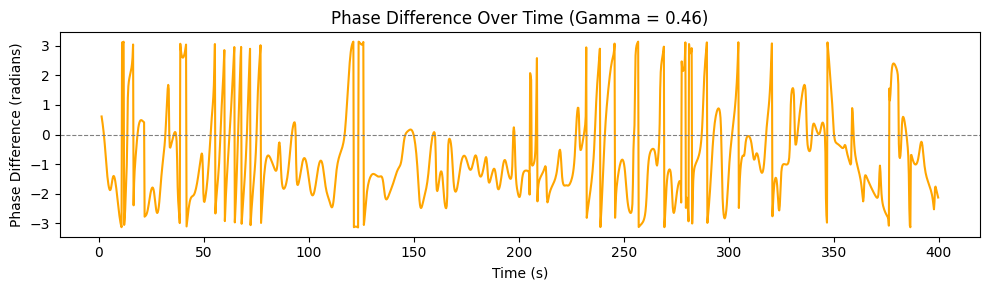

In [ ]:
# Resample acc_y phase to the RRI time base
from scipy.interpolate import interp1d
interp_acc_y_phase = interp1d(t, phase_acc_y, kind='linear', bounds_error=False, fill_value=np.nan)
aligned_acc_y_phase = interp_acc_y_phase(equidistant_times_rr[valid_indices])
rr_phase = phase_RRI

# Phase difference (wrapped)
phase_diff = aligned_acc_y_phase - rr_phase
phase_diff_wrapped = (phase_diff + np.pi) % (2 * np.pi) - np.pi

plt.figure(figsize=(10, 5))
plt.plot(equidistant_times_rr[valid_indices], aligned_acc_y_phase, label='acc_y phase')
plt.plot(equidistant_times_rr[valid_indices], rr_phase, label='rri phase')
plt.xlabel('Time (s)')
plt.ylabel('Phase (radians)')
plt.title('Instantaneous Phases: acc_y and rri')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(equidistant_times_rr[valid_indices], phase_diff_wrapped, color='orange')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Phase Difference (radians)')
plt.title(f'Phase Difference Over Time (Gamma = {gamma:.2f})')
plt.tight_layout()
plt.show()


Phase Synchronization Index (gamma) acc_x - RRI: 0.463


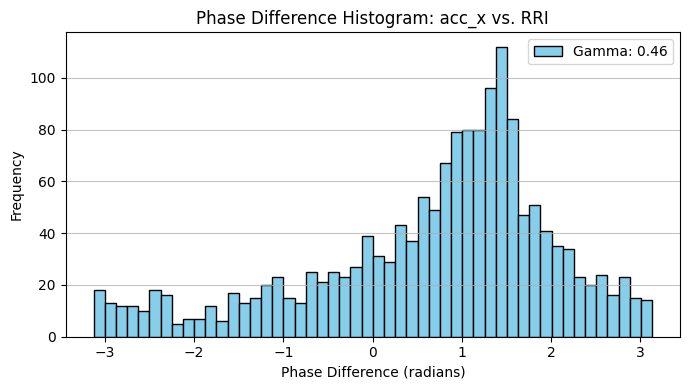

In [ ]:
# If not already computed:
# phase_acc_x = get_instantaneous_phase(Fil_acc_x)

# Interpolate phase_acc_x to RR-interval time base
interp_acc_x_phase = interp1d(t, phase_acc_x, kind='linear', bounds_error=False, fill_value=np.nan)
aligned_acc_x_phase = interp_acc_x_phase(equidistant_times_rr[valid_indices])

# Phase difference, wrapped to [-pi, pi]
phase_diff_x_rri = aligned_acc_x_phase - phase_RRI
phase_diff_x_rri_wrapped = (phase_diff_x_rri + np.pi) % (2 * np.pi) - np.pi

# Synchronization index gamma for acc_x - RRI
gamma_x_rri = np.abs(np.mean(np.exp(1j * phase_diff_x_rri_wrapped)))
print(f"Phase Synchronization Index (gamma) acc_x - RRI: {gamma_x_rri:.3f}")

plt.figure(figsize=(7, 4))
plt.hist(phase_diff_x_rri_wrapped, bins=50, color='skyblue', edgecolor='black',
         label=f'Gamma: {gamma_x_rri:.2f}')
plt.title('Phase Difference Histogram: acc_x vs. RRI')
plt.xlabel('Phase Difference (radians)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.tight_layout()
plt.show()


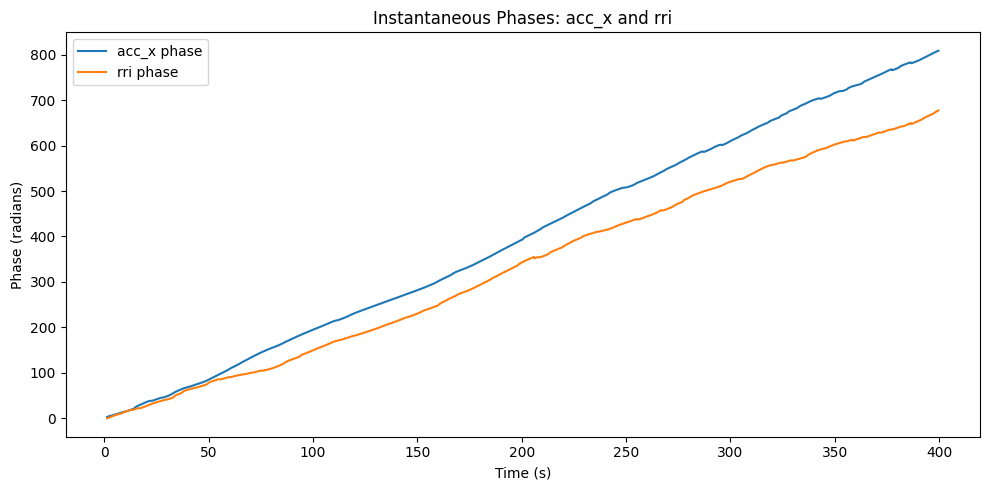

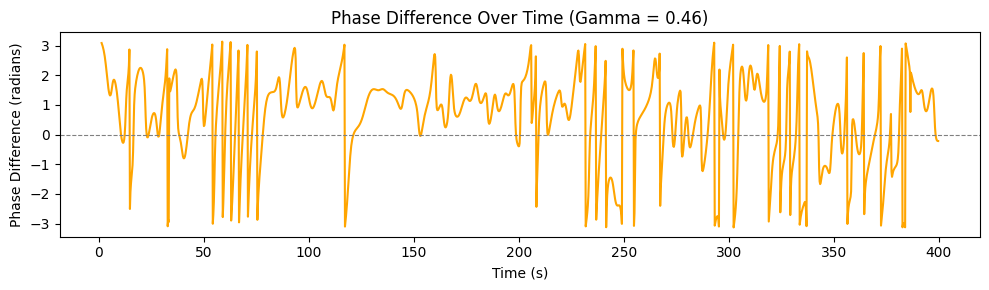

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(equidistant_times_rr[valid_indices], aligned_acc_x_phase, label='acc_x phase')
plt.plot(equidistant_times_rr[valid_indices], phase_RRI, label='rri phase')
plt.xlabel('Time (s)')
plt.ylabel('Phase (radians)')
plt.title('Instantaneous Phases: acc_x and rri')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(equidistant_times_rr[valid_indices], phase_diff_x_rri_wrapped, color='orange')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Phase Difference (radians)')
plt.title(f'Phase Difference Over Time (Gamma = {gamma_x_rri:.2f})')
plt.tight_layout()
plt.show()


Phase Synchronization Index (gamma) Peaks - RRI: 0.512


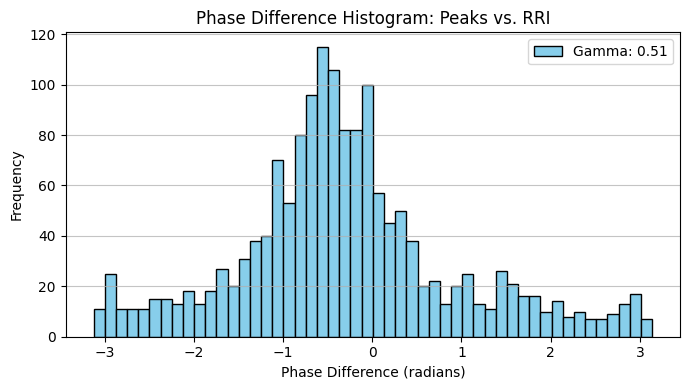

In [ ]:
# Compute phase difference (Peaks - RRI), already aligned to same time base (equidistant_times_rr[valid_indices])
phase_diff_peaks_rri = aligned_phase_peaks - phase_RRI
phase_diff_peaks_rri_wrapped = (phase_diff_peaks_rri + np.pi) % (2 * np.pi) - np.pi

# Synchronization index (gamma)
gamma_peaks_rri = np.abs(np.mean(np.exp(1j * phase_diff_peaks_rri_wrapped)))
print(f"Phase Synchronization Index (gamma) Peaks - RRI: {gamma_peaks_rri:.3f}")

# Plot histogram
plt.figure(figsize=(7, 4))
plt.hist(phase_diff_peaks_rri_wrapped, bins=50, color='skyblue', edgecolor='black',
         label=f'Gamma: {gamma_peaks_rri:.2f}')
plt.title('Phase Difference Histogram: Peaks vs. RRI')
plt.xlabel('Phase Difference (radians)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.tight_layout()
plt.show()


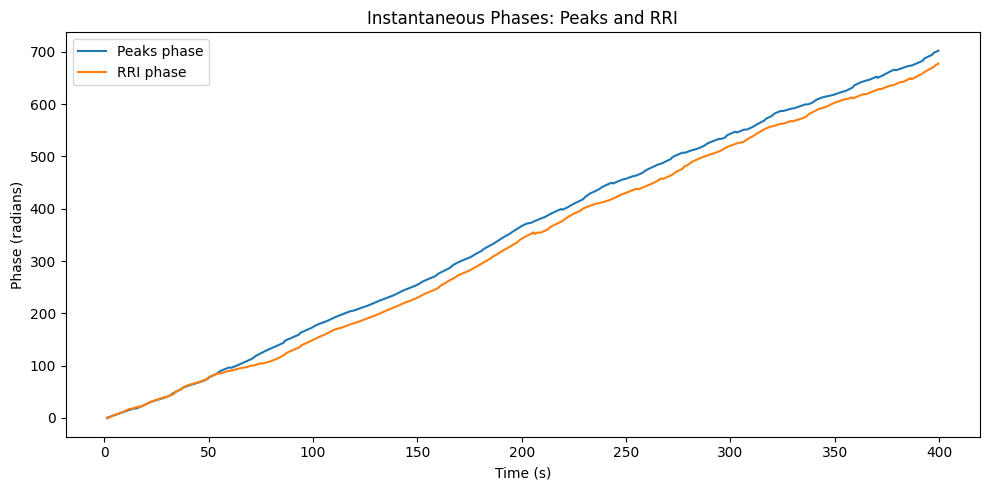

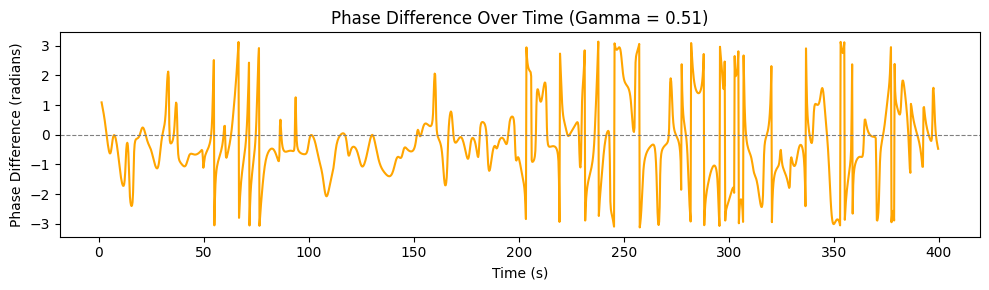

In [ ]:
# Plot instantaneous phases: Peaks and RRI
plt.figure(figsize=(10, 5))
plt.plot(aligned_times_peaks_RRI, aligned_phase_peaks, label='Peaks phase')
plt.plot(aligned_times_peaks_RRI, phase_RRI, label='RRI phase')
plt.xlabel('Time (s)')
plt.ylabel('Phase (radians)')
plt.title('Instantaneous Phases: Peaks and RRI')
plt.legend()
plt.tight_layout()
plt.show()

# Plot phase difference: Peaks - RRI
plt.figure(figsize=(10, 3))
plt.plot(aligned_times_peaks_RRI, phase_diff_peaks_rri_wrapped, color='orange')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Phase Difference (radians)')
plt.title(f'Phase Difference Over Time (Gamma = {gamma_peaks_rri:.2f})')
plt.tight_layout()
plt.show()

